In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from  matplotlib import pyplot as plt


In [2]:
import pandas as pd
df = pd.read_csv("customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df = df.drop("customerID",axis = "columns")


In [4]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2766,Female,0,Yes,No,64,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,115.00,7396.15,No
5973,Male,0,No,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.40,6692.65,No
2472,Male,0,Yes,No,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),70.90,4677.1,No
404,Male,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.70,419.4,No
1551,Male,0,No,No,22,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,566.5,No


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df["MonthlyCharges"].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges, errors = "coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
drop = df[pd.to_numeric(df.TotalCharges, errors = "coerce").isnull()]
drop.shape

(11, 20)

In [10]:
df1 = df[df.TotalCharges != " "]

In [11]:
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
tenure_churn_no = df1[df1["Churn"] == "No"].tenure
tenure_churn_yes = df1[df1["Churn"] == "Yes"].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

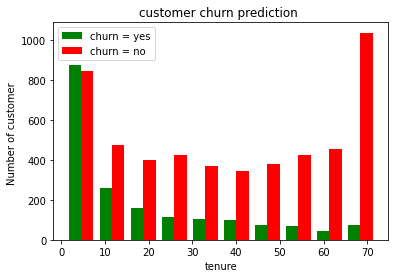

In [15]:
plt.xlabel("tenure")
plt.ylabel("Number of customer ")
plt.title("customer churn prediction ")
plt.hist([tenure_churn_yes,tenure_churn_no], color = ["green", "red"], label = ["churn = yes", "churn = no"])
plt.legend()

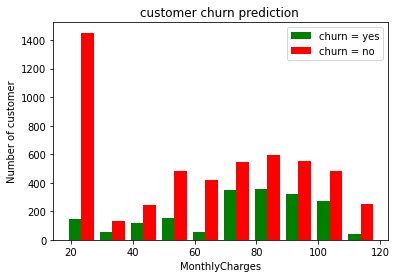

In [16]:
tenure_churn_no = df1[df1["Churn"] == "No"].MonthlyCharges
tenure_churn_yes = df1[df1["Churn"] == "Yes"].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of customer")
plt.title("customer churn prediction ")
plt.hist([tenure_churn_yes,tenure_churn_no], color = ["green", "red"], label = ["churn = yes", "churn = no"])
plt.legend()

In [17]:
def unique_values(df):
    for column in df1:
        if df[column].dtypes == "object":
            print(f' {column}: {df[column].unique()}')

In [18]:
unique_values(df1)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No phone service' 'No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes' 'No internet service']
 OnlineBackup: ['Yes' 'No' 'No internet service']
 DeviceProtection: ['No' 'Yes' 'No internet service']
 TechSupport: ['No' 'Yes' 'No internet service']
 StreamingTV: ['No' 'Yes' 'No internet service']
 StreamingMovies: ['No' 'Yes' 'No internet service']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [19]:
df1.replace("No internet service", "No", inplace = True)
df1.replace("No phone service", "No", inplace = True)

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
unique_values(df1)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes']
 OnlineBackup: ['Yes' 'No']
 DeviceProtection: ['No' 'Yes']
 TechSupport: ['No' 'Yes']
 StreamingTV: ['No' 'Yes']
 StreamingMovies: ['No' 'Yes']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [21]:
yes_no_columns = ["Partner","Dependents", "PhoneService", "MultipleLines","OnlineSecurity", "OnlineBackup", 
                  "DeviceProtection", "TechSupport","StreamingTV","StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_columns:
    df1[col].replace({"Yes":1, "No":0,}, inplace = True)

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
for col in df1:
      print(f' {col}: {df1[col].unique()}')
    

 gender: ['Female' 'Male']
 SeniorCitizen: [0 1]
 Partner: [1 0]
 Dependents: [0 1]
 tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService: [0 1]
 MultipleLines: [0 1]
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: [0 1]
 OnlineBackup: [1 0]
 DeviceProtection: [0 1]
 TechSupport: [0 1]
 StreamingTV: [0 1]
 StreamingMovies: [0 1]
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: [1 0]
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn: [0 1]


In [23]:
df1.replace({"Female": 1, "Male":0}, inplace = True)

In [24]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [25]:
df2 = pd.get_dummies(data = df1, columns = ["InternetService", "Contract","PaymentMethod"])

In [26]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5777,0,0,1,0,72,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1
5437,1,1,0,0,20,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5031,0,0,1,1,9,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5252,0,1,1,0,71,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [29]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [30]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1605,0,0,0,0,0.901408,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
319,0,0,1,0,0.478873,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1638,1,0,1,1,0.943662,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [31]:
X = df2.drop("Churn", axis = "columns")
Y = df2.Churn

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)

In [33]:
X_train.shape

(5625, 26)

In [34]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = "relu" ),
     #keras.layers.Dense(15,  activation = "relu" ),
      keras.layers.Dense(1, activation = "sigmoid" )
])
    
    
model.compile(optimizer = "adam",
            loss = "binary_crossentropy",
          metrics = ["accuracy"]  
             )
              
model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 783us/step - loss: 0.5014 - accuracy: 0.7595
Epoch 2/100
176/176 [==============================] - 0s 780us/step - loss: 0.4282 - accuracy: 0.7961
Epoch 3/100
176/176 [==============================] - 0s 674us/step - loss: 0.4199 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 0s 737us/step - loss: 0.4164 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 0s 652us/step - loss: 0.4149 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 567us/step - loss: 0.4133 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 0s 589us/step - loss: 0.4117 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 589us/step - loss: 0.4106 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 572us/step - loss: 0.4095 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 0s 578us/step - l

176/176 [==============================] - 0s 561us/step - loss: 0.3798 - accuracy: 0.8215
Epoch 80/100
176/176 [==============================] - 0s 550us/step - loss: 0.3796 - accuracy: 0.8220
Epoch 81/100
176/176 [==============================] - 0s 561us/step - loss: 0.3793 - accuracy: 0.8224
Epoch 82/100
176/176 [==============================] - 0s 550us/step - loss: 0.3790 - accuracy: 0.8229
Epoch 83/100
176/176 [==============================] - 0s 538us/step - loss: 0.3795 - accuracy: 0.8235
Epoch 84/100
176/176 [==============================] - 0s 561us/step - loss: 0.3785 - accuracy: 0.8244
Epoch 85/100
176/176 [==============================] - 0s 538us/step - loss: 0.3784 - accuracy: 0.8222
Epoch 86/100
176/176 [==============================] - 0s 578us/step - loss: 0.3782 - accuracy: 0.8251
Epoch 87/100
176/176 [==============================] - 0s 550us/step - loss: 0.3793 - accuracy: 0.8194
Epoch 88/100
176/176 [==============================] - 0s 555us/step - loss:

In [35]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 594us/step - loss: 0.4591 - accuracy: 0.7797


[0.45914149284362793, 0.7796730399131775]

In [36]:
yp = model.predict(X_test)
yp[:5]

array([[0.13768125],
       [0.36685926],
       [0.00805858],
       [0.7716452 ],
       [0.5130213 ]], dtype=float32)

In [37]:
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [38]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [40]:
from sklearn.metrics import  classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.51      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

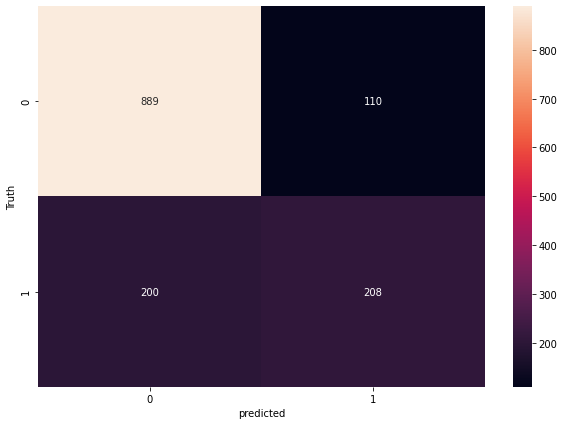

In [41]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions =y_pred)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted")
plt.ylabel("Truth")